In [ ]:
# imports
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os
!pip install pydub
from pydub import AudioSegment
import glob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
audio_sum_male = 0
audio_sum_female = 0

directory_female = '/content/drive/MyDrive/60'
directory_male = '/content/drive/MyDrive/15' 

for i in range(10):
  for j in range(50):
    filepath_f = directory_female + '/' + str(i) + '_60_' + str(j)+'.wav'
    filepath_m = directory_male + '/' + str(i) + '_15_' + str(j)+'.wav'
    audio_sum_female += AudioSegment.from_wav(filepath_f)
    audio_sum_male += AudioSegment.from_wav(filepath_m)

audio_sum_female.export("/content/drive/MyDrive/sample_female.wav", format="wav")
audio_sum_male.export("/content/drive/MyDrive/sample_male.wav", format="wav")


<_io.BufferedRandom name='/content/drive/MyDrive/sample_male.wav'>

In [ ]:
male_audio, sr_m = librosa.load("/content/drive/MyDrive/sample_male.wav")

In [ ]:
female_audio, sr_f = librosa.load("/content/drive/MyDrive/sample_female.wav")

In [ ]:
male_audio

array([-0.00036636, -0.00054188, -0.00045742, ...,  0.00056298,
        0.00057089,  0.        ], dtype=float32)

In [ ]:
female_audio

array([1.2102760e-05, 9.4238803e-06, 2.9782192e-05, ..., 1.4083400e-04,
       1.8556209e-04, 0.0000000e+00], dtype=float32)

In [ ]:
male_audio.shape

(5983017,)

In [ ]:
female_audio.shape

(7956896,)

In [ ]:
# dtft
def plot_magnitude_spectrum(signal, title, sr, f_ratio):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)

    # plot
    plt.figure(figsize=(18, 5))
    
    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency) * f_ratio)

    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("frequency(Hz.)")
    plt.title(title)
    plt.show()

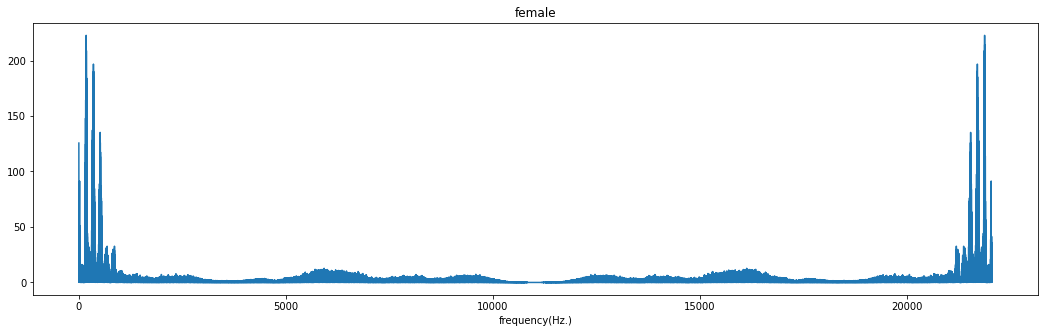

In [ ]:
plot_magnitude_spectrum(female_audio,"female", sr_f, 1)

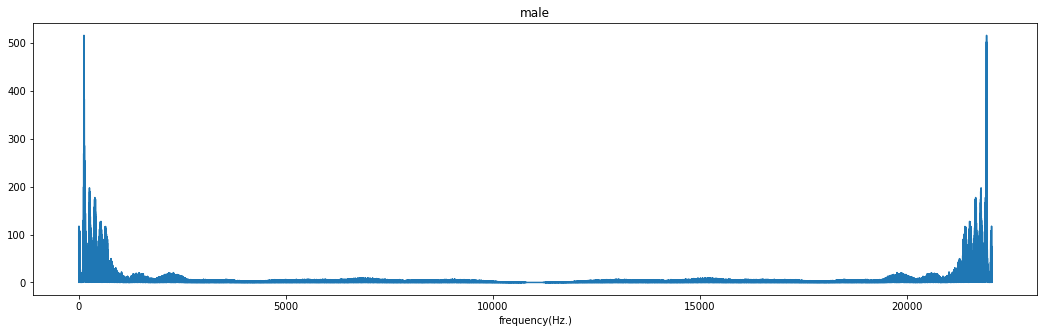

In [ ]:
plot_magnitude_spectrum(male_audio,"male", sr_m, 1.0)

# SPECTOGRAM

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512

*...but first taking out short term fourire transform of each sample*

In [ ]:
Stft_male = librosa.stft(male_audio, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)

In [ ]:
Stft_male.size

11978150

In [ ]:
Stft_female = librosa.stft(female_audio, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)

In [ ]:
Stft_female.size

15929525

In [ ]:
type(Stft_male[0][0])

numpy.complex64

*...Now taking out power(i.e. amplitude^2) each sample*

In [ ]:
Y_male = np.abs(Stft_male)**2

In [ ]:
Y_male.size

11978150

In [ ]:
Y_female = np.abs(Stft_female)**2

In [ ]:
Y_female.size

15929525

In [ ]:
type(Y_male[0][0])

numpy.float32

###**Visualizing Sprectogram**

In [ ]:
def plot_spectogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr = sr,
                             hop_length = hop_length,
                             x_axis = "time",
                             y_axis = y_axis
                             )
    plt.colorbar(format = "%+2.f")

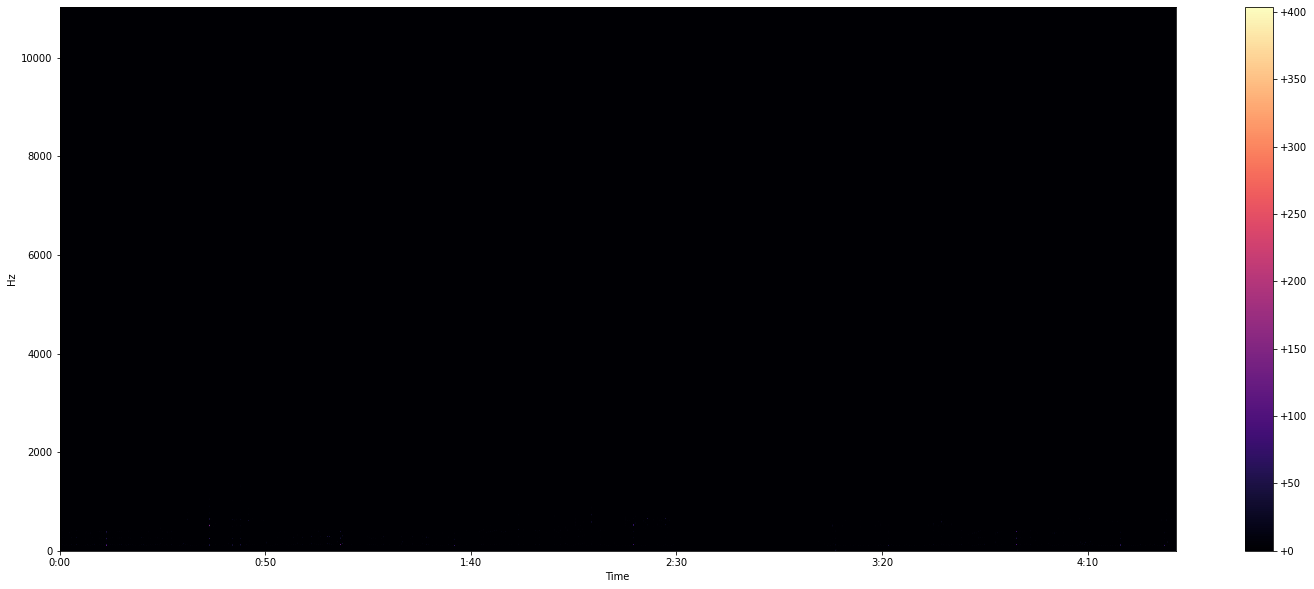

In [ ]:
plot_spectogram(Y_male, sr_m, HOP_SIZE)

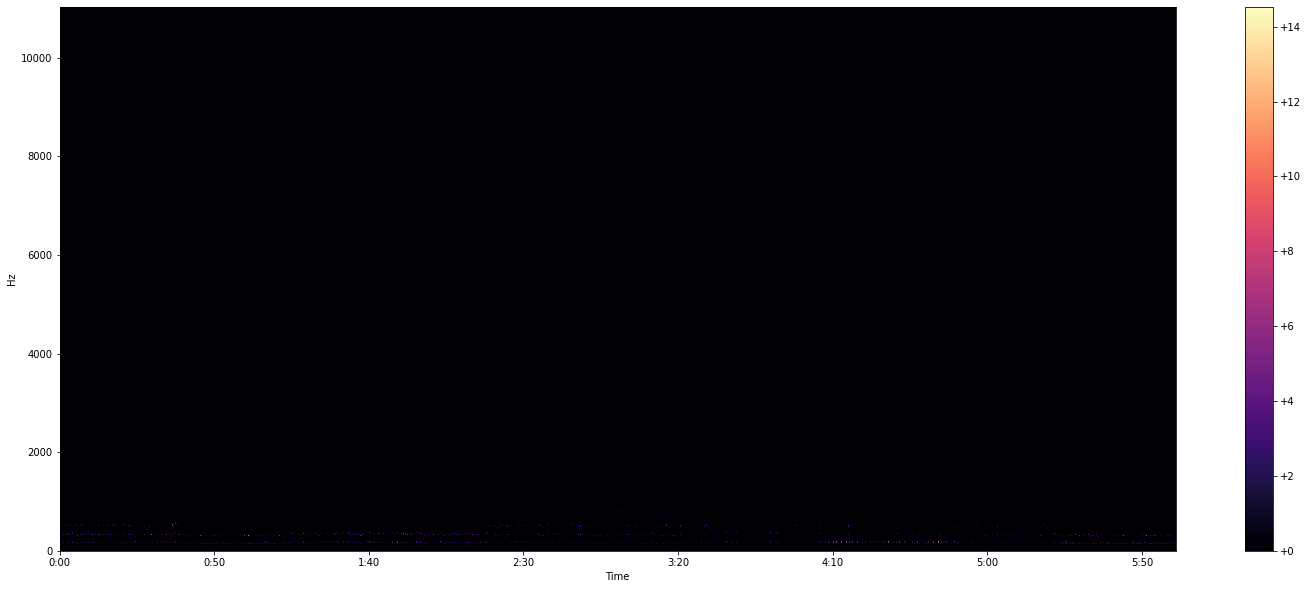

In [ ]:
plot_spectogram(Y_female, sr_f, HOP_SIZE)

### **Log-Amplitude Spectogram**
**power/amplitude and decibles have logarithmic relationship i.e. :

*db = 10 log(p1/p2)*

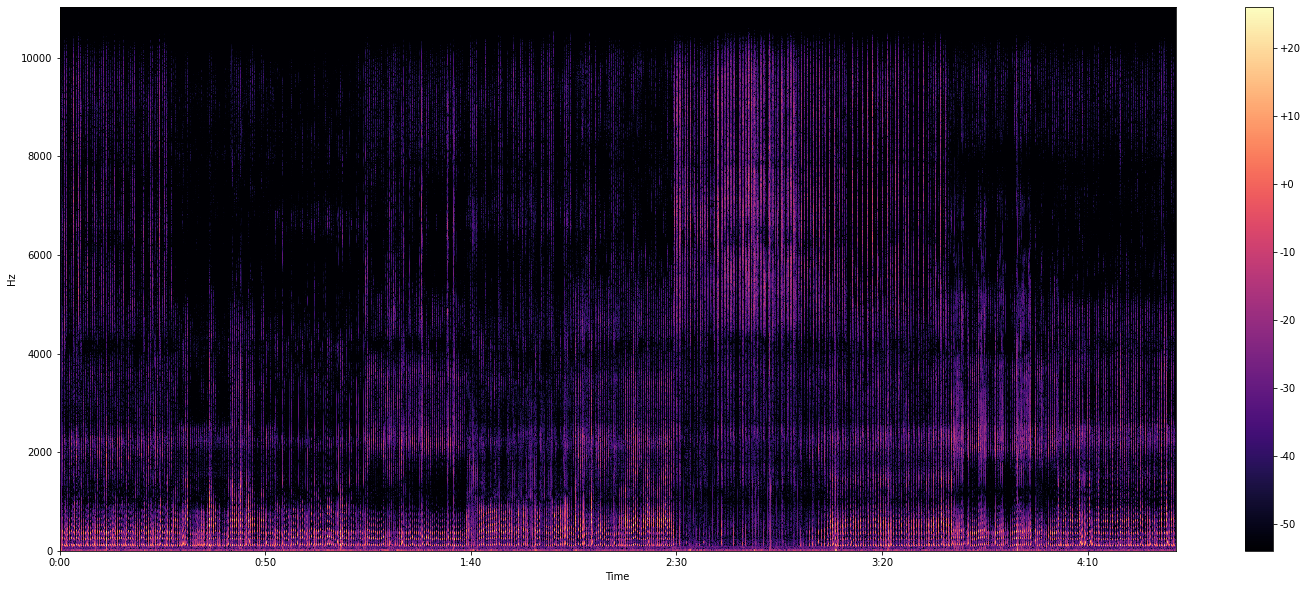

In [ ]:
Y_log_male = librosa.power_to_db(Y_male) # db->decibles
plot_spectogram(Y_log_male, sr_m, HOP_SIZE)

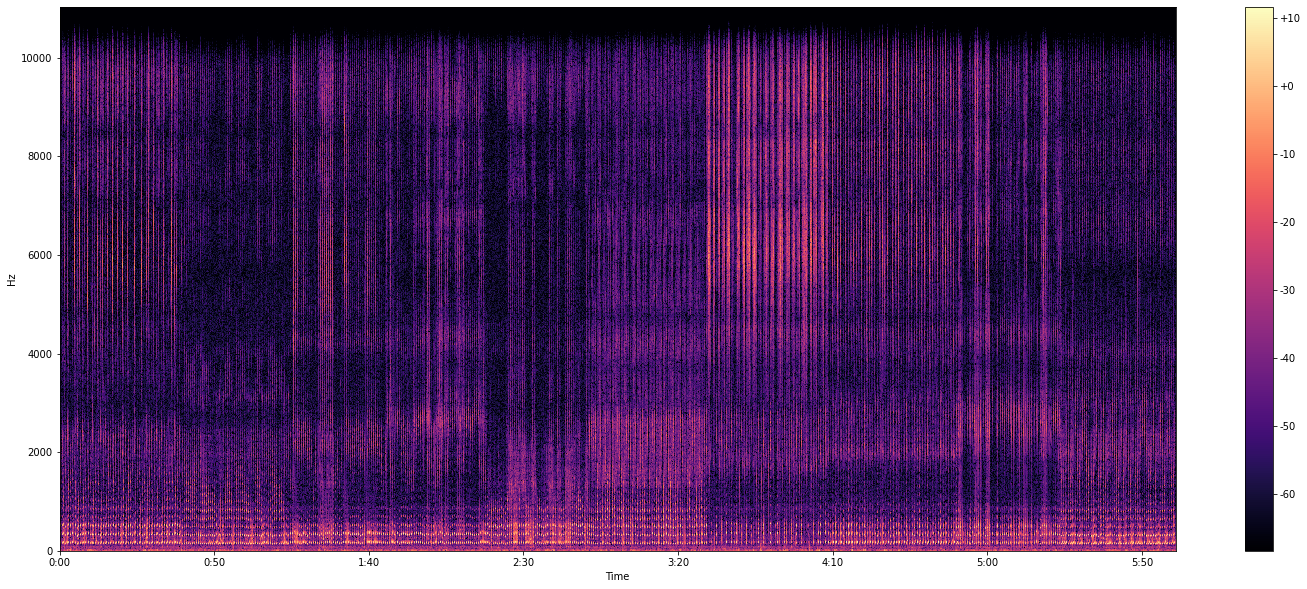

In [ ]:
Y_log_female = librosa.power_to_db(Y_female) # db->decibles
plot_spectogram(Y_log_female, sr_f, HOP_SIZE)

### **Log-Frequency Spectogram**
*We perceive frequency in a logarithmic manner so, this representation makes more sense*

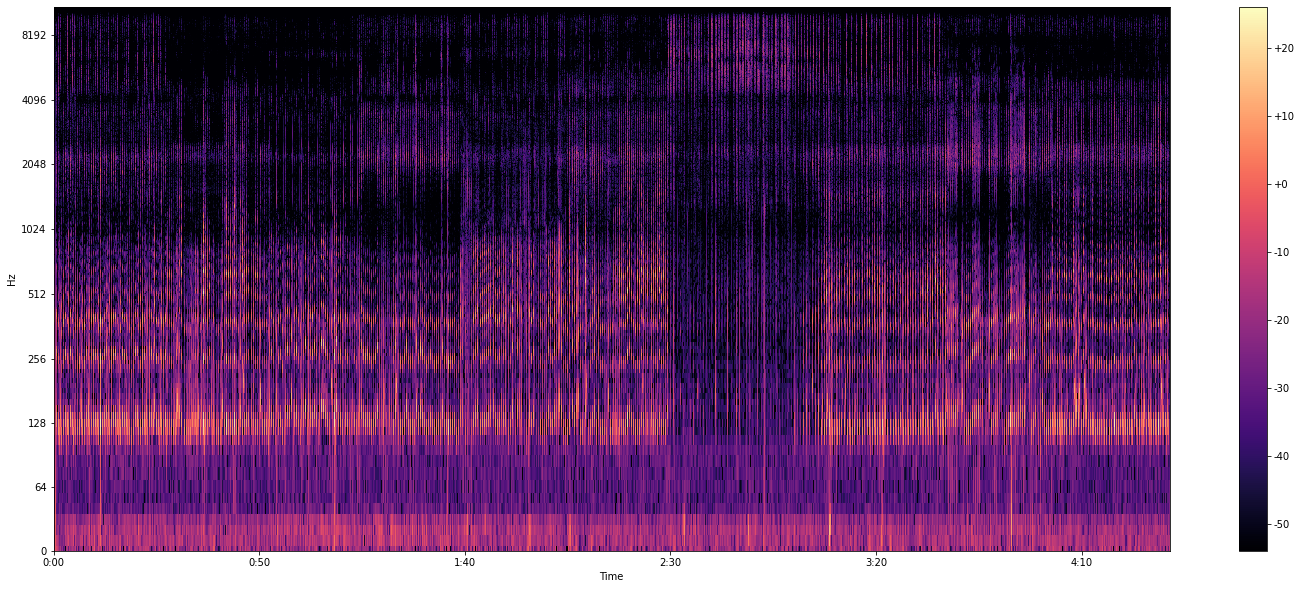

In [ ]:
plot_spectogram(Y_log_male, sr_m, HOP_SIZE, y_axis="log")

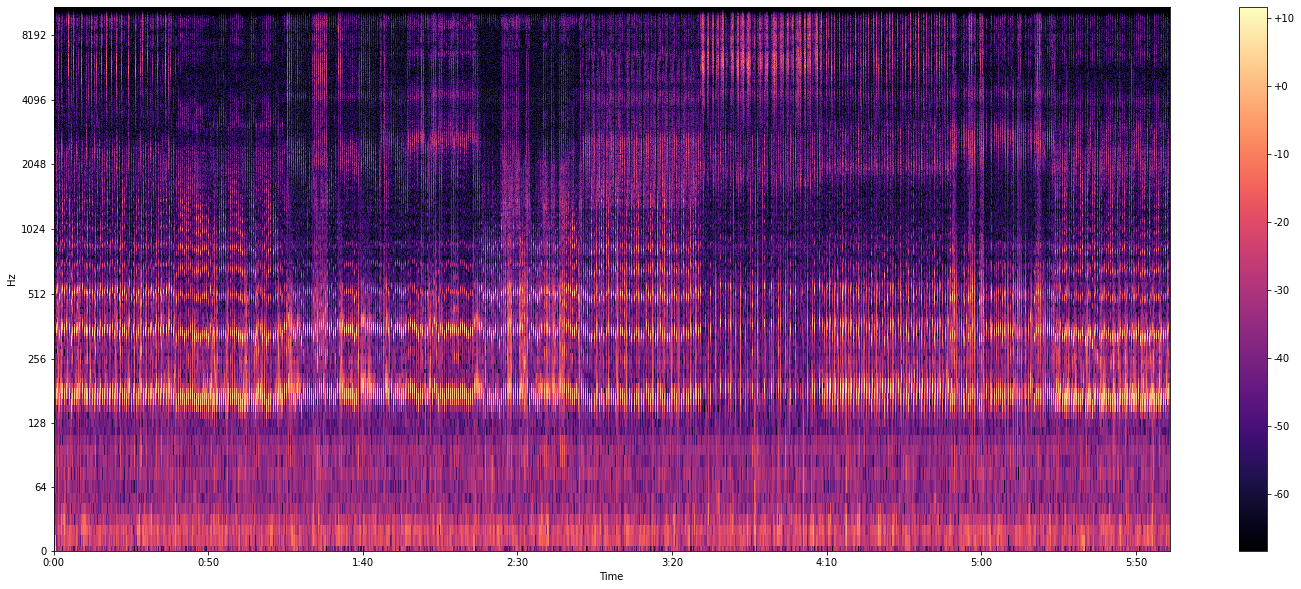

In [ ]:
plot_spectogram(Y_log_female, sr_f, HOP_SIZE, y_axis="log")

##MFCC

In [ ]:
# mel filter banks
filter_banks = librosa.filters.mel(n_fft = 2048, sr = 22050, n_mels = 10) # n_mels->selecting number of mel banks  

In [ ]:
filter_banks.shape

(10, 1025)

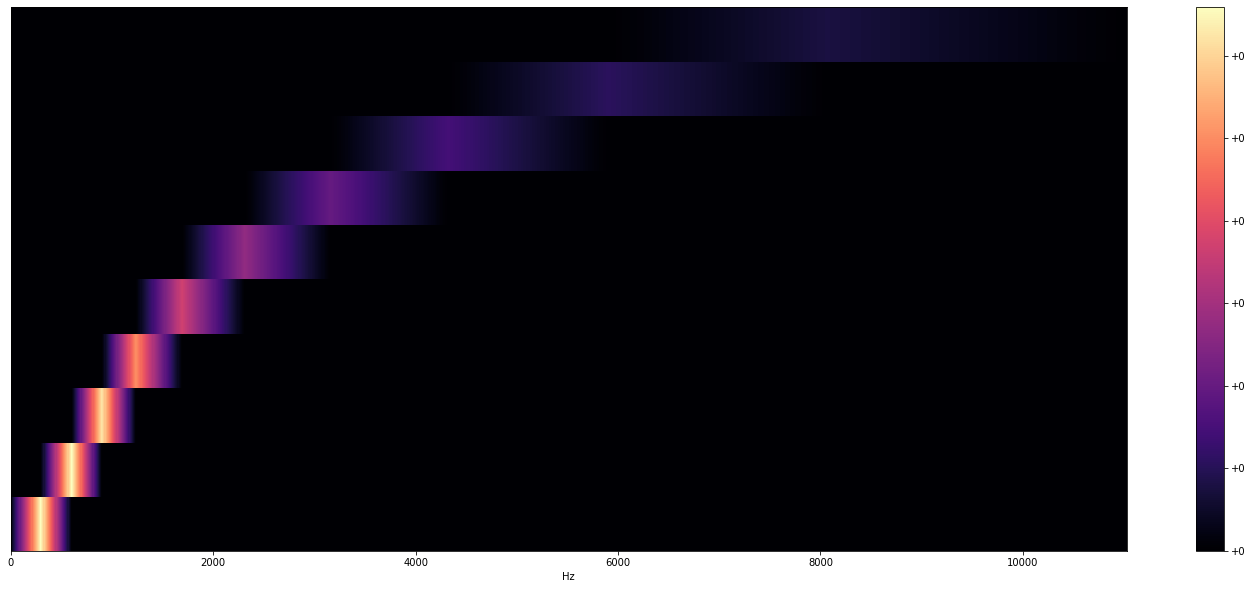

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                         sr = 22050,
                         x_axis = "linear"
                         )
plt.colorbar(format = "%+2.f")
plt.show() # shows the mel bank's spread over frequencies

### *Extracting Mel Spectrogram*

In [ ]:
mel_spectrogram_male = librosa.feature.melspectrogram(male_audio, sr = sr_m, n_fft = 2048, hop_length = 512, n_mels = 120)
mel_spectrogram_female = librosa.feature.melspectrogram(female_audio, sr = sr_f, n_fft = 2048, hop_length = 512, n_mels = 120)

In [ ]:
log_mel_spectrogram_male = librosa.power_to_db(mel_spectrogram_male)
log_mel_spectrogram_female = librosa.power_to_db(mel_spectrogram_female)

In [ ]:
def plot_log_mel_spectogram(log_mel, sr):
  plt.figure(figsize=(25,10))

  librosa.display.specshow(log_mel,
                          sr = sr,
                          x_axis = "time",
                          y_axis = "mel")
  plt.colorbar(format = "%+2.f")
  plt.show() # in this plot y-axis is made of discrete chunks 

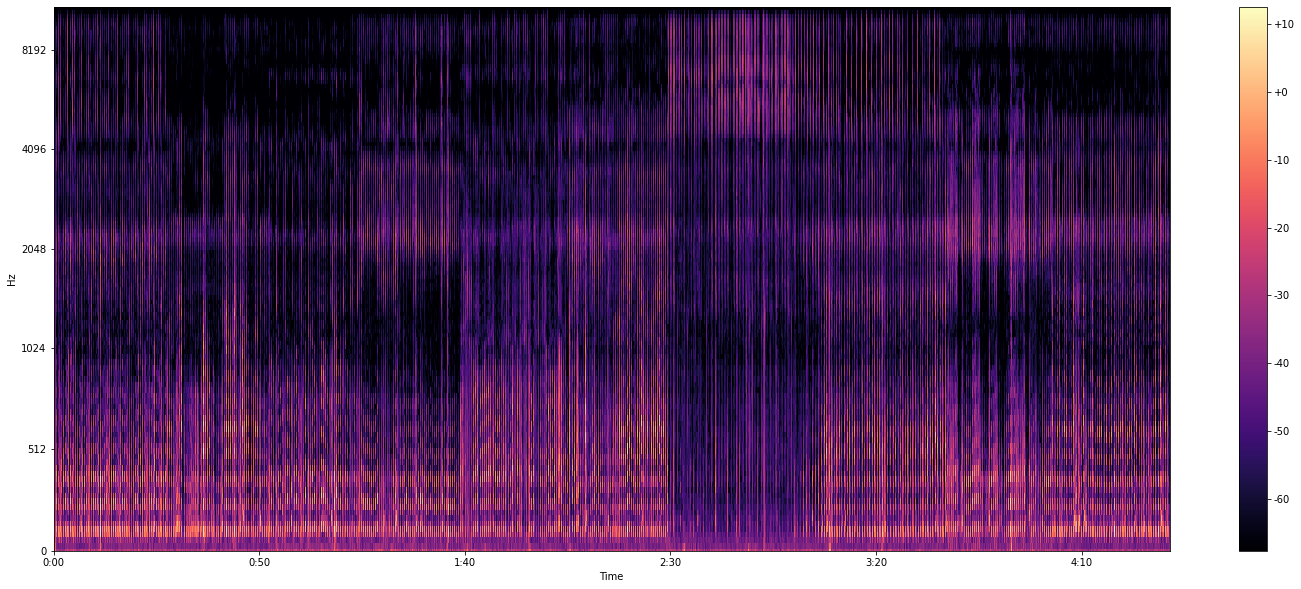

In [ ]:
plot_log_mel_spectogram(log_mel_spectrogram_male, sr_m)

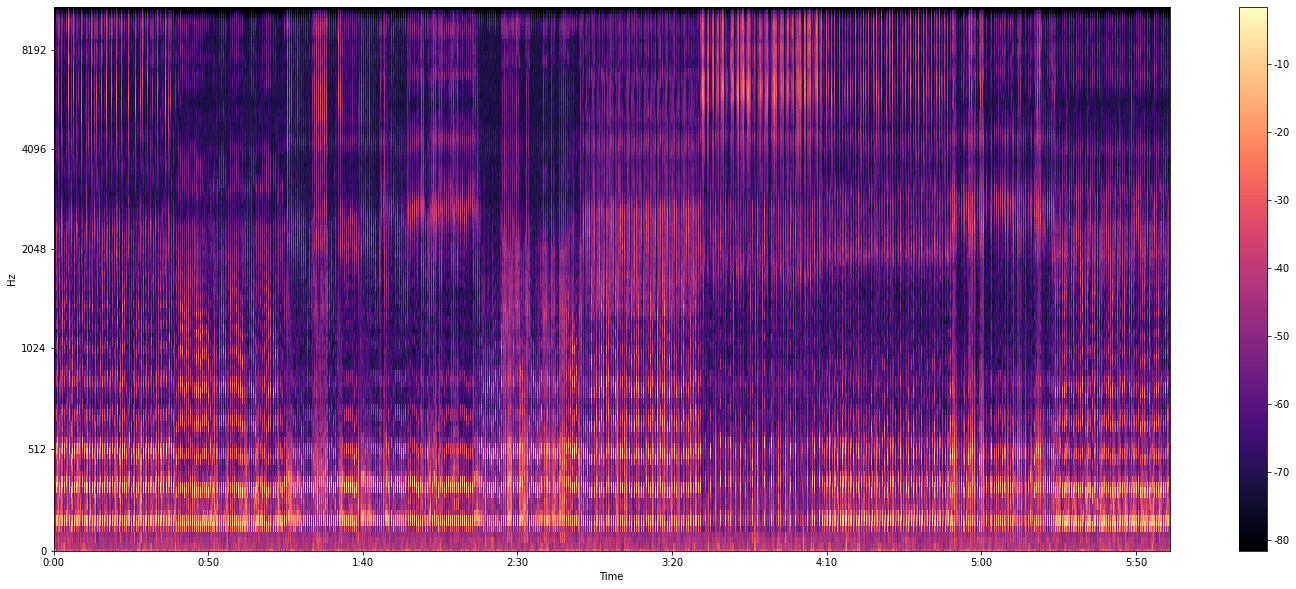

In [ ]:
plot_log_mel_spectogram(log_mel_spectrogram_female, sr_f)

-------------------------------------------------
###**Calculate Bandwidth**

In [ ]:
FRAME_SIZE = 1024
HOP_SIZE = 512

In [ ]:
ban_male = librosa.feature.spectral_bandwidth(y = male_audio, sr = sr_m, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)[0]
ban_female = librosa.feature.spectral_bandwidth(y = female_audio, sr = sr_f, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)[0]

In [ ]:
ban_female = np.array(ban_female[0:1000])
ban_male = np.array(ban_male[0:1000])

In [ ]:
ban_male.shape

(1000,)

In [ ]:
ban_female.shape

(1000,)

###**Visualise Bandwidth**

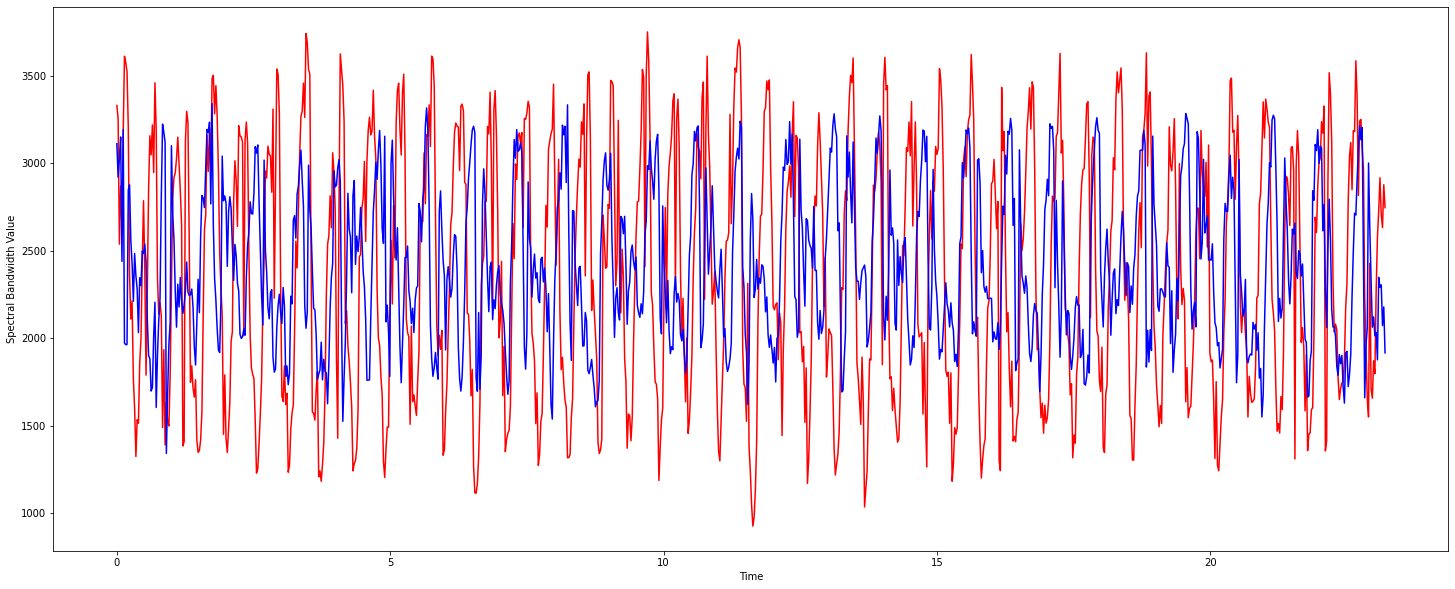

In [ ]:
plt.figure(figsize = (25,10))
# getting time values
frames = range(len(ban_male))
t = librosa.frames_to_time(frames)

plt.plot(t, ban_male, color='r')
plt.plot(t, ban_female, color='b')

plt.xlabel("Time")
plt.ylabel("Spectral Bandwidth Value")

plt.show() # plot is almost same as the the previous one, because bandwidth is "derived" from spectral centroid values itself